Check that the auto-correlations of the simulation are a sane value when calibrated into K.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pyuvdata import UVData
import os
from glob import glob
import hera_pspec as hp
from hera_pspec.data import DATA_PATH
import time

In [2]:
sim_path = '/data4/paper/HERA19Golden/Simulation/'

In [3]:
# Read in the simulated data
sim_autos = UVData()
sim_autos.read_uvh5(sim_path+'zen.2457756.14819.xx.HH.uvCP.autos.uvh5')

In [4]:
# For these purposes, it matters not what the frequency array is, so long as they are all the same
freqs = np.unique(sim_autos.freq_array) # I worry the sims don't quite match the data

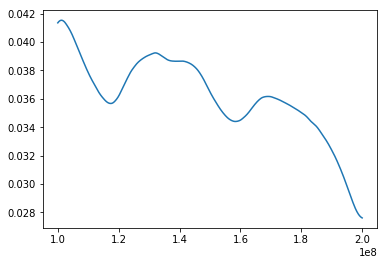

In [5]:
# Bring in the beam calibration to K
cosmo = hp.conversions.Cosmo_Conversions()
# List of beamfile to load. This is a healpix map.
beamfile = os.path.join(DATA_PATH, 'NF_HERA_Beams.beamfits')
# intantiate beam and pass cosmology, if not fed, a default Planck cosmology will be assumed
uvb = hp.pspecbeam.PSpecBeamUV(beamfile, cosmo=cosmo)
# find conversion factor from Jy to K.  xx and yy are the same.
Jy_to_K = uvb.Jy_to_mK(freqs,pol='xx')/1000.

# Plot it
plt.plot(freqs,Jy_to_K)
plt.show()

In [6]:
# For the autos with the simulation, it really doesn't matter which antenna you pick ... right?
sim_autos.get_antpairs()

[(9, 9)]

In [8]:
T_sky = 180.*np.power(freqs/180.e6,-2.55)
auto_sim = sim_autos.get_data((9,9))

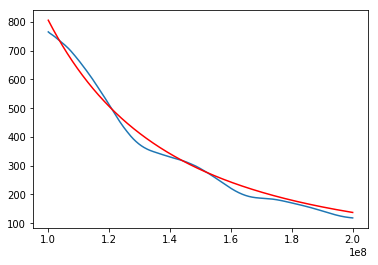

In [9]:
plt.plot(freqs,auto_sim[0,:].real*Jy_to_K)
plt.plot(freqs,T_sky,color='red')
plt.show()

In [48]:
print sim_autos.lst_array.min()
print sim_autos.lst_array.max()
print sim_autos.freq_array.shape

0.0003616008724188767
6.282205780571237
(1, 1024)


In [94]:
def lstfreqwaterfall(uvd,bl=(9,9)):
    plt.figure(figsize=(10,6))
    lst = uvd.lst_array.squeeze()*24./(2.*np.pi)
    freq = uvd.freq_array.squeeze()/1e6
    data = uvd.get_data(bl,force_copy=True)
    flags = ~uvd.get_flags(bl,force_copy=True)
    T = data.real/flags*Jy_to_K
    plt.imshow(T,aspect='auto',
               extent=[freq.min(),freq.max(),lst.max(),lst.min()],vmax=3000,vmin=0)
    plt.ylim([23,10.6])
    plt.colorbar()
    return

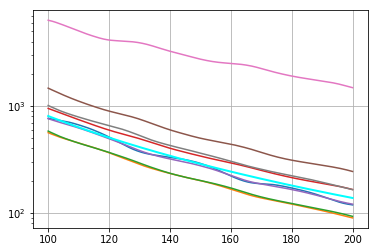

In [12]:
for t in np.arange(0,8000,1000):
    plt.semilogy(freqs/1e6,sim_autos.data_array.squeeze()[t,:].real*Jy_to_K)
plt.plot(freqs/1e6,T_sky,color='cyan',linewidth=2)
plt.grid()
plt.show()

In [67]:
# Now for that juicy real data ...
datapath = '/data4/paper/HERA19Golden/CalibratedData/2457548/'
#'/data4/paper/HERA19Golden/RawData/2457548/'
#'/data4/paper/HERA19Golden/CalibratedData/LSThrs_10.5_23.0/'
datafile = 'zen.2457548.46619.xx.HH.uvcRPCS.uvh5'
#'zen.2457548.16694.xx.HH.uvcRPCS.uvh5'
#'zen.2457548.32700.yx.HH.uvcRP.uvh5'  
#'zen.2457548.16700_66112.xx.HH.uvcRPCS.uvh5'

In [86]:
realfiles = glob(datapath+'zen.2457548.*.xx.HH.uvcRPCS.uvh5')

In [109]:
real_autos = UVData()
#real_autos.read_uvh5(realfiles[0],bls=(9,9))
#for realfile in realfiles[1:]:
#    print realfile
#    tmp = UVData()
#    tmp.read_uvh5(realfile,bls=(9,9))
#    real_autos += tmp
#real_autos.write_uvh5('zen.2457548.xx.HH.auto9.uvcRPCS.uvh5')
real_autos.read_uvh5('zen.2457548.xx.HH.auto9.uvcRPCS.uvh5')

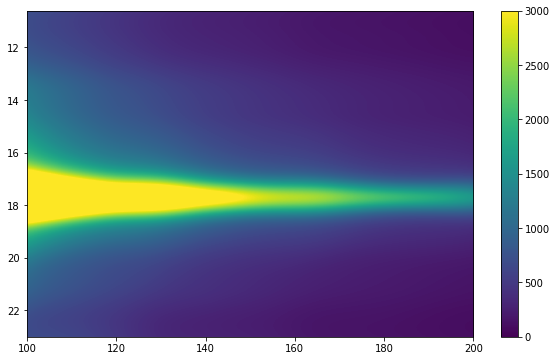

In [110]:
lstfreqwaterfall(sim_autos)

divide by zero encountered in divide
invalid value encountered in divide


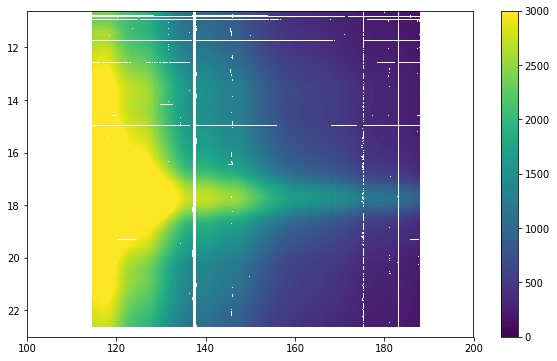

In [111]:
lstfreqwaterfall(real_autos)

In [102]:
lst0 = 17.75*2.*np.pi/24.
print lst0

4.64693913343


In [112]:
lst0_sim = np.argmin(np.abs(sim_autos.lst_array - lst0))
print sim_autos.lst_array[lst0_sim]

4.646788407056318


In [113]:
lst0_real = np.argmin(np.abs(real_autos.lst_array - lst0))
print real_autos.lst_array[lst0_real]

4.646627136760878


In [114]:
real_autos.data_array.shape

(4021, 1, 1024, 1)

divide by zero encountered in divide


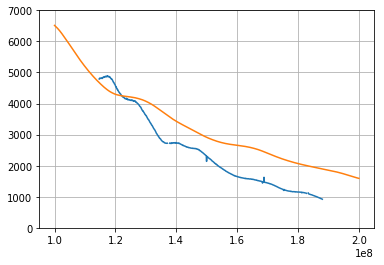

In [116]:
plt.plot(freqs,
         real_autos.data_array.squeeze()[lst0_real,:].real /
         ~real_autos.flag_array.squeeze()[lst0_real,:] * Jy_to_K)
plt.plot(freqs,
         sim_autos.data_array.squeeze()[lst0_sim,:].real /
         ~sim_autos.flag_array.squeeze()[lst0_sim,:] * Jy_to_K)
plt.ylim([0,7000])
plt.grid()
plt.show()